In [1]:
import glob
import os
import pandas as pd
import numpy as np
import tqdm as tqdm
import matplotlib.pyplot as plt
import seaborn as sns

### Analysis of global dsdncv in immuno genes, non HLA-I genes, Hartwig

In [ ]:
output_hartwig="/home/fran/Documents/cuppen/HPC/tunnel/cuppen/projects/P0020_genetics_immune_escape/large_scale_primary_met/processed/hmf/positive_selection/dndscv/"

In [3]:
l,l1=[], []
for filein in glob.glob(f"{output_hartwig}/pancancer.dndscv.target_nohla.tsv.gz"):
    ttype = os.path.basename(filein).split(".")[0]
    df = pd.read_csv(filein,sep="\t")
    df["ttype"] = ttype
    l.append(df)
df_immuno_met = pd.concat(l)
df_immuno_met.set_index("ttype",inplace=True)


In [4]:
colors={"wmis":"#e41a1c","wnon":"#377eb8","wspl":"#377eb8","wall":"#4daf4a","wtru":"#984ea3"}
def get_coordinates(keys):
    y_total,cis_total,ci_u, i_x, cs =  [], [] , [], [], []
    i=0
    labels=[]
    for ttype in set(df_immuno_met.index):
        data = df_immuno_met.loc[ttype]
        # wmis
        vs,cis=[],[]
        for key in keys:
            v,l,h=data[data["name"]==key][["mle","cilow","cihigh"]].values.tolist()[0]
            cs.append(colors[key])
            vs.append(v)
            cis.append([v-l,np.nanmin([h-v,20])])
            i_x.append(i)
            i+=1
        i+=5
        labels+=[ttype]
        y_total+=vs
        cis_total+=cis
    return y_total,cis_total,i_x,labels


def plot_ci_ratios(gene,df_ci,cohort):
    fig,ax = plt.subplots(figsize=(1.5,2))
    colors={"missense_variant/inframe_variant":"#66c2a5","truncating_variant":"#fc8d62","splice_variant":"#8da0cb"}
    mles=df_ci[df_ci["gene"]==gene][["mis_mle","tru_mle"]].values.tolist()[0]
    cis_total=[[mles[0] - float(df_ci[df_ci["gene"]==gene]["mis_low"]),float(df_ci[df_ci["gene"]==gene]["mis_high"]) - mles[0]],[mles[1] - float(df_ci[df_ci["gene"]==gene]["tru_low"]),float(df_ci[df_ci["gene"]==gene]["tru_high"]) - mles[1]]]
    ax.errorbar(x=0,y=mles[0],ecolor=colors["missense_variant/inframe_variant"],c= colors["missense_variant/inframe_variant"],capthick=3,fmt='o',elinewidth=1.9,markersize=10,yerr=np.array(cis_total[0:1]).T,markeredgecolor="black")
    ax.errorbar(x=1,y=mles[1],ecolor=colors["truncating_variant"],c=colors["truncating_variant"], capthick=3,fmt='o',elinewidth=1.9,markersize=10, yerr=np.array(cis_total[1:2]).T,markeredgecolor="black")
    _=ax.set_xticks([0,1])

    ax.axhline(y=1,ls="--",color="black")

    #ax.set_ylim(0,20)
    ax.set_title(gene,fontsize=12)

    ax.set_ylabel("dNdS ratio",fontsize=12)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)



    ax.set_xlim(-.25,1.25)
    maxv=list(df_ci[df_ci["gene"]==gene]["mis_high"].values)+list(df_ci[df_ci["gene"]==gene]["tru_high"].values)
    ax.set_ylim(-0.5,int(np.nanmax(maxv))+1)
    ax.set_xticklabels(["missense","truncating"],rotation=90)
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.savefig(f'../results/figures/figure5/ci_excess_{gene}_{cohort}.pdf', dpi=800,bbox_inches="tight")


### Analysis of global dsdncv in immuno genes, non HLA-I genes, PCAWG

In [ ]:
output_pcawg="/home/fran/Documents/cuppen/HPC/tunnel/cuppen/projects/P0020_genetics_immune_escape/large_scale_primary_met/processed/pcawg/positive_selection/dndscv/"

In [5]:
l,l1=[], []
for filein in glob.glob(f"{output_pcawg}/pancancer.dndscv.target_nohla.tsv.gz"):
    ttype = os.path.basename(filein).split(".")[0]
    df = pd.read_csv(filein,sep="\t")
    df["ttype"] = ttype
    l.append(df)
df_immuno_primary = pd.concat(l)
df_immuno_primary.set_index("ttype",inplace=True)

### Prepare it

In [6]:
pallete = {"wt":"#ef8a62","alteration":"#67a9cf","alteration_primary":"#7570b3"}
order = list(df_immuno_met.loc["pancancer"]["name"].values)
met=df_immuno_met.loc["pancancer"].set_index("name")
primary=df_immuno_primary.loc["pancancer"].set_index("name")
i_x,y_total,cis_total,colors = [], [] , [], []
base=0
for o in order:
    i_x+=[base,base+1]
    base+=3
    v_met,v_primary = met.loc[o]["mle"],primary.loc[o]["mle"]
    cis_met = [v_met - met.loc[o]["cilow"],met.loc[o]["cihigh"] - v_met ]
    cis_primary = [v_primary - primary.loc[o]["cilow"],primary.loc[o]["cihigh"] - v_primary ]
    y_total+=[v_met,v_primary]
    cis_total+=[cis_met,cis_primary]
    colors+=["#998ec3","#f1a340"]

    


### Visualize Hartwig, met

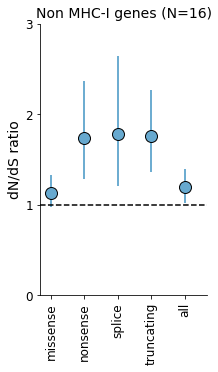

In [10]:
fig,ax = plt.subplots(figsize=(3,5))
ax.errorbar(x=i_x[0::2],y=y_total[0::2],ecolor=pallete["alteration"], capthick=3,fmt='o',elinewidth=1.9,markersize=12,c=pallete["alteration"] , yerr=np.array(cis_total[0::2]).T,markeredgecolor="black")

_=ax.set_xticks(i_x[0::2])

ax.axhline(y=1,ls="--",color="black")

#ax.set_ylim(0,20)
ax.set_title("Non MHC-I genes (N=16)",fontsize=14)

ax.set_ylabel("dN/dS ratio",fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

_=ax.set_yticks(range(0,4,1))

ax.set_xlim(-1,14)

ax.set_xticklabels(["missense","nonsense","splice","truncating","all"],rotation=90)

markers = [plt.Line2D([0,0],[0,0],color=colors[0], marker='o', linestyle=''),plt.Line2D([0,0],[0,0],color=colors[1], marker='o', linestyle=''), ]
ax.tick_params(axis='both', which='major', labelsize=12)

plt.savefig(f'../results/figures/figure5/dndscv_global_met_nonhla.pdf', dpi=800,bbox_inches="tight")

### Visualize PCAWG, primary

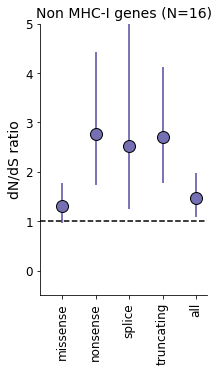

In [9]:
fig,ax = plt.subplots(figsize=(3,5))
ax.errorbar(x=i_x[1::2],y=y_total[1::2],ecolor=pallete["alteration_primary"], capthick=3,fmt='o',elinewidth=1.9,markersize=12,c=pallete["alteration_primary"], yerr=np.array(cis_total[1::2]).T,markeredgecolor="black")

_=ax.set_xticks(i_x[1::2])

ax.axhline(y=1,ls="--",color="black")

#ax.set_ylim(0,20)
ax.set_title("Non MHC-I genes (N=16)",fontsize=14)

ax.set_ylabel("dN/dS ratio",fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

_=ax.set_yticks(range(0,6,1))

ax.set_xlim(-1,14)
ax.set_ylim(-0.5,5)

ax.set_xticklabels(["missense","nonsense","splice","truncating","all"],rotation=90)

markers = [plt.Line2D([0,0],[0,0],color=colors[0], marker='o', linestyle=''),plt.Line2D([0,0],[0,0],color=colors[1], marker='o', linestyle=''), ]
ax.tick_params(axis='both', which='major', labelsize=12)

plt.savefig(f'../results/figures/figure5/dndscv_global_primary_nonhla.pdf', dpi=800,bbox_inches="tight")